In [107]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import gmaps

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
from config import g_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size = 1500)
lngs = np.random.uniform(-180,180, size = 1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=93e8da1e2881e96791828dd0b6a4443b


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | sorland
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | paidha
Processing Record 7 of Set 1 | cam ranh
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | ijaki
City not found. Skipping...
Processing Record 10 of Set 1 | livramento
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | auki
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | poum
Processing Record 15 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | asifabad
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | ampanihy
Processing Record 20 of Set 1 | saint-pierre
Process

Processing Record 35 of Set 4 | faanui
Processing Record 36 of Set 4 | tandil
Processing Record 37 of Set 4 | laguna
Processing Record 38 of Set 4 | ossora
Processing Record 39 of Set 4 | fare
Processing Record 40 of Set 4 | umm durman
City not found. Skipping...
Processing Record 41 of Set 4 | olafsvik
Processing Record 42 of Set 4 | batangafo
Processing Record 43 of Set 4 | port hedland
Processing Record 44 of Set 4 | lagoa
Processing Record 45 of Set 4 | skovde
City not found. Skipping...
Processing Record 46 of Set 4 | vrangel
Processing Record 47 of Set 4 | phek
Processing Record 48 of Set 4 | hue
Processing Record 49 of Set 4 | saskylakh
Processing Record 50 of Set 4 | lexington
Processing Record 1 of Set 5 | ilulissat
Processing Record 2 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 5 | mnogovershinnyy
Processing Record 4 of Set 5 | arvika
Processing Record 5 of Set 5 | airai
Processing Record 6 of Set 5 | port blair
Processing Record 7 of Set 5 |

Processing Record 23 of Set 8 | kavaratti
Processing Record 24 of Set 8 | maymanak
City not found. Skipping...
Processing Record 25 of Set 8 | povenets
Processing Record 26 of Set 8 | bosaso
Processing Record 27 of Set 8 | joensuu
Processing Record 28 of Set 8 | outlook
Processing Record 29 of Set 8 | san juan del sur
Processing Record 30 of Set 8 | talnakh
Processing Record 31 of Set 8 | chicama
Processing Record 32 of Set 8 | tombouctou
Processing Record 33 of Set 8 | tateyama
Processing Record 34 of Set 8 | pochinok
Processing Record 35 of Set 8 | kilindoni
Processing Record 36 of Set 8 | namtsy
Processing Record 37 of Set 8 | kalabo
Processing Record 38 of Set 8 | matara
Processing Record 39 of Set 8 | komsomolskiy
Processing Record 40 of Set 8 | leningradskiy
Processing Record 41 of Set 8 | slave lake
Processing Record 42 of Set 8 | palamos
Processing Record 43 of Set 8 | yumen
Processing Record 44 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 45 of Set 8 

Processing Record 12 of Set 12 | afyonkarahisar
Processing Record 13 of Set 12 | nyurba
Processing Record 14 of Set 12 | mogadishu
Processing Record 15 of Set 12 | vila velha
Processing Record 16 of Set 12 | smithers
Processing Record 17 of Set 12 | guarapari
Processing Record 18 of Set 12 | iberia
Processing Record 19 of Set 12 | calabozo
Processing Record 20 of Set 12 | leshukonskoye
Processing Record 21 of Set 12 | mankono
Processing Record 22 of Set 12 | moron
Processing Record 23 of Set 12 | henties bay
Processing Record 24 of Set 12 | camacha
Processing Record 25 of Set 12 | kaputa
Processing Record 26 of Set 12 | lasa
Processing Record 27 of Set 12 | teguldet
Processing Record 28 of Set 12 | villa carlos paz
Processing Record 29 of Set 12 | creel
Processing Record 30 of Set 12 | vila
Processing Record 31 of Set 12 | pasighat
Processing Record 32 of Set 12 | hendijan
City not found. Skipping...
Processing Record 33 of Set 12 | alappuzha
Processing Record 34 of Set 12 | santa eula

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longyearbyen,78.22,15.64,32.00,94,75,16.11,SJ,2020-05-06 05:20:39
1,Bredasdorp,-34.53,20.04,57.20,87,2,3.36,ZA,2020-05-06 05:20:39
2,Sorland,67.67,12.69,37.40,83,75,26.40,NO,2020-05-06 05:20:39
3,Hobart,-42.88,147.33,60.80,51,75,6.93,AU,2020-05-06 05:19:15
4,Paidha,2.42,30.99,65.25,89,98,3.04,UG,2020-05-06 05:20:39
5,Cam Ranh,11.92,109.16,98.60,44,0,13.87,VN,2020-05-06 05:20:40
6,Livramento,-3.03,-60.18,77.00,100,20,1.88,BR,2020-05-06 05:20:40
7,Albany,42.60,-73.97,42.01,83,59,3.18,US,2020-05-06 05:17:53
8,Auki,-8.77,160.70,84.49,65,82,3.31,SB,2020-05-06 05:20:40
9,Busselton,-33.65,115.33,57.00,93,58,26.22,AU,2020-05-06 05:20:40


In [10]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Longyearbyen,SJ,2020-05-06 05:20:39,78.22,15.64,32.00,94,75,16.11
1,Bredasdorp,ZA,2020-05-06 05:20:39,-34.53,20.04,57.20,87,2,3.36
2,Sorland,NO,2020-05-06 05:20:39,67.67,12.69,37.40,83,75,26.40
3,Hobart,AU,2020-05-06 05:19:15,-42.88,147.33,60.80,51,75,6.93
4,Paidha,UG,2020-05-06 05:20:39,2.42,30.99,65.25,89,98,3.04
5,Cam Ranh,VN,2020-05-06 05:20:40,11.92,109.16,98.60,44,0,13.87
6,Livramento,BR,2020-05-06 05:20:40,-3.03,-60.18,77.00,100,20,1.88
7,Albany,US,2020-05-06 05:17:53,42.60,-73.97,42.01,83,59,3.18
8,Auki,SB,2020-05-06 05:20:40,-8.77,160.70,84.49,65,82,3.31
9,Busselton,AU,2020-05-06 05:20:40,-33.65,115.33,57.00,93,58,26.22


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time

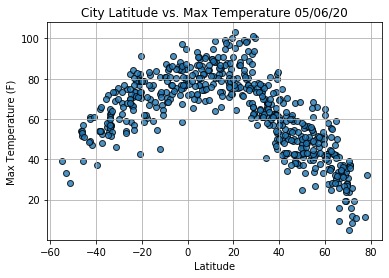

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

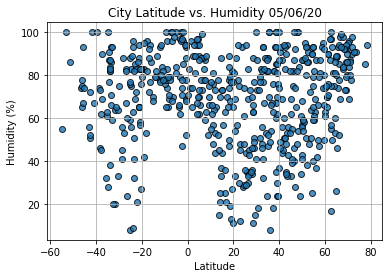

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

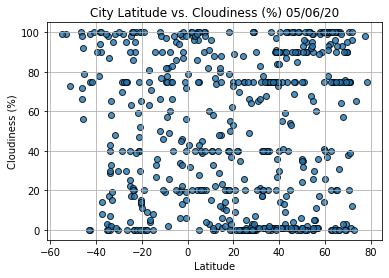

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

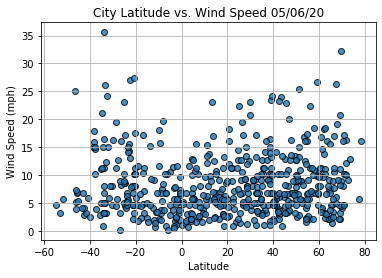

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Linear Regression

In [49]:
from scipy.stats import linregress

In [81]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is: {r_value:.3f}")
    print(f"The p-value is: {p_value:.3f}")

In [82]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

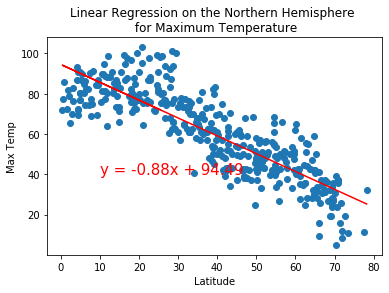

The r-value is: -0.855
The p-value is: 0.000


In [83]:
# Linear regression on the Northern Hemisphere Lat vs. Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                        'Max Temp',(10,40))
             

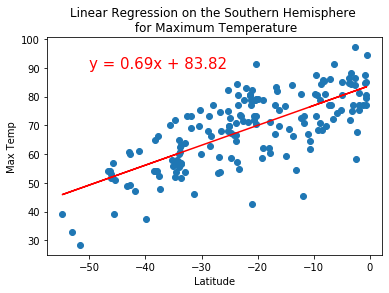

The r-value is: 0.724
The p-value is: 0.000


In [84]:
# Linear regression on the Southern Hemisphere Lat vs. Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))

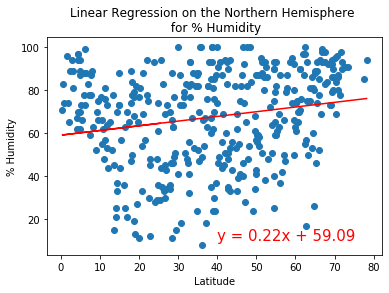

The r-value is: 0.197
The p-value is: 0.000


In [86]:
# Linear regression on the Northern Hemisphere Lat vs. % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

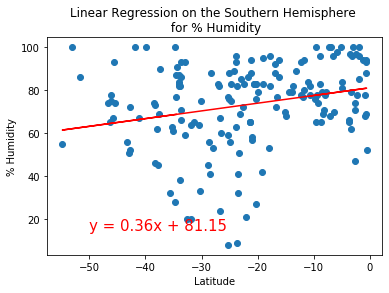

The r-value is: 0.245
The p-value is: 0.001


In [88]:
# Linear regression on the Southern Hemisphere Lat vs. % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

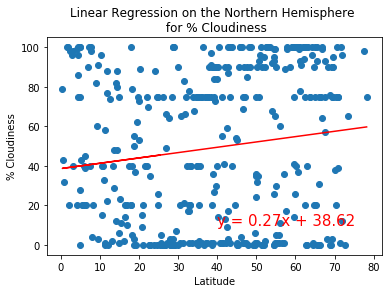

The r-value is: 0.142
The p-value is: 0.006


In [89]:
# Linear regression on the Northern Hemisphere Lat vs. % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                      '% Cloudiness', (40,10))

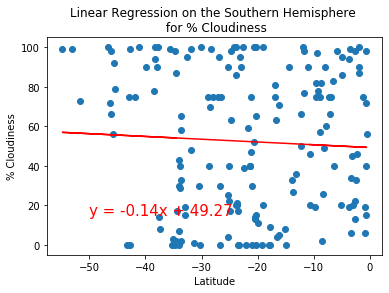

The r-value is: -0.053
The p-value is: 0.495


In [90]:
# Linear regression on the Southern Hemisphere Lat vs. % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                      '% Cloudiness',(-50,15))

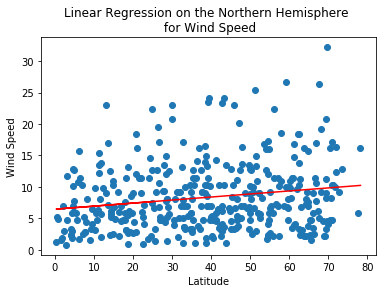

The r-value is: 0.181
The p-value is: 0.000


In [92]:
# Linear regression on the Northern Hemisphere Lat vs. Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

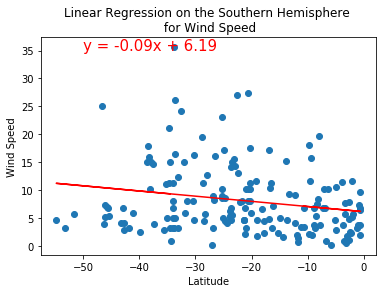

The r-value is: -0.204
The p-value is: 0.007


In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))